# Rahul Raj 15EE35006

# Term paper on 'Band Sparse matrix based FDM to calculate Capacitance'

In [1]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy import constants

In [16]:
epsilon = constants.value(u'electric constant')
dielectric_constant = 5
l = 0.06  #Input length of capacitor
g = 0.00162 #Input gap between plates
w = 0.01  #Input width of capacitor
n_x = 7  #No. of nodes in horizontal direction 
n_y = 7  #No. of nodes in vertical direction
V_l = 5  #Voltage at left plate
V_r = -5  #Voltage at right plate

In [3]:
#Defining Band Sparse Matrix
s_row = (n_y-2)*(n_y-2)
s_col = (n_x-2)*(n_x-2)
S = np.zeros((s_row, s_col))
for i in range (s_row):
    for j in range (i, s_col):
        if (i==j):
            S[i][j]=-4
            if (j+1 < s_col):
                S[i][j+1]=1
            if (j+5 < s_col):
                S[i][j+5]=1
        if (i%5==4 and j%5==0):
            S[i][j]=0
        S[j][i]=S[i][j]
S[0][0] = -4
S[0][n_x-2] = 1
pd.DataFrame(S).to_csv("sparse.csv")
print(S)

[[-4.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -4.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -4.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0. -4.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  1. -4.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  1. -4.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  1. -4.  1.  0.  0.  0.  1.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  1. -4.  0.  0.  0.  

In [6]:
#Checking symmetric nature of Band matrix
def check_symmetric(a, tol=1e-8):
    return np.allclose(a, a.T, atol=tol)
check_symmetric(S)

True

In [9]:
#Forming fixed node voltage matrix
B = np.zeros((s_row,1))
for i in range(s_row):
    if (i%(n_y-2)==0):
        B[i][0]=-5
    if (i%(n_y-2)==(n_y-3)):
        B[i][0]=5
print(B)

[[-5.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 5.]
 [-5.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 5.]
 [-5.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 5.]
 [-5.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 5.]
 [-5.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 5.]]


In [11]:
#Calculating free node volatges
from numpy.linalg import inv
S_inverse = inv(S)
v = np.dot(S_inverse, B)
v.shape
v_2D = np.reshape(v, (-1, 5))
pd.DataFrame(v_2D).to_csv("free-vol.csv")
print(v_2D)

[[  2.18686869e+00   8.68686869e-01  -1.23165367e-16  -8.68686869e-01
   -2.18686869e+00]
 [  2.87878788e+00   1.28787879e+00  -1.42247325e-16  -1.28787879e+00
   -2.87878788e+00]
 [  3.04040404e+00   1.40404040e+00  -2.49800181e-16  -1.40404040e+00
   -3.04040404e+00]
 [  2.87878788e+00   1.28787879e+00  -2.22044605e-16  -1.28787879e+00
   -2.87878788e+00]
 [  2.18686869e+00   8.68686869e-01  -5.89805982e-17  -8.68686869e-01
   -2.18686869e+00]]


In [13]:
V = np.zeros((n_x, n_y))
for i in range (n_x):
    for j in range (n_y):
        if (j==0):
            V[i][j]=V_l
        if (j==(n_x-1)):
            V[i][j]=V_r
        if (i>0 and i<n_y-1) and (j>0 and j<n_x-1):
            V[i][j] = v_2D[i-1][j-1]
pd.DataFrame(V).to_csv("all-vol.csv")
print(V)

[[  5.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00  -5.00000000e+00]
 [  5.00000000e+00   2.18686869e+00   8.68686869e-01  -1.23165367e-16
   -8.68686869e-01  -2.18686869e+00  -5.00000000e+00]
 [  5.00000000e+00   2.87878788e+00   1.28787879e+00  -1.42247325e-16
   -1.28787879e+00  -2.87878788e+00  -5.00000000e+00]
 [  5.00000000e+00   3.04040404e+00   1.40404040e+00  -2.49800181e-16
   -1.40404040e+00  -3.04040404e+00  -5.00000000e+00]
 [  5.00000000e+00   2.87878788e+00   1.28787879e+00  -2.22044605e-16
   -1.28787879e+00  -2.87878788e+00  -5.00000000e+00]
 [  5.00000000e+00   2.18686869e+00   8.68686869e-01  -5.89805982e-17
   -8.68686869e-01  -2.18686869e+00  -5.00000000e+00]
 [  5.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00  -5.00000000e+00]]


In [14]:
#Calculating Electric Field
h = g/(n_x-1)  #width for each square element
#Creating matrix for Electric field between nodes
E = np.zeros((n_x-2, n_y-1))  
for i in range(n_y-2):
    for j in range(n_x-1):
        E[i][j] = (V[i+1][j]-V[i+1][j+1])/h
pd.DataFrame(E).to_csv("field-band.csv")
print(E)

[[ 10419.00486345   4882.15488215   3217.35877291   3217.35877291
    4882.15488215  10419.00486345]
 [  7856.34118967   5892.25589226   4769.92143659   4769.92143659
    5892.25589226   7856.34118967]
 [  7257.76281332   6060.60606061   5200.14964459   5200.14964459
    6060.60606061   7257.76281332]
 [  7856.34118967   5892.25589226   4769.92143659   4769.92143659
    5892.25589226   7856.34118967]
 [ 10419.00486345   4882.15488215   3217.35877291   3217.35877291
    4882.15488215  10419.00486345]]


In [17]:
#Calculating Flux Density
epsilon_r = epsilon*dielectric_constant  #permittivity of medium between plates
#Creating matrix for Flux Density between nodes
D = np.zeros((n_x-2, n_y-1))  
for i in range(n_y-2):
    for j in range(n_x-1):
        D[i][j] = E[i][j]*epsilon_r
print(D)

[[  4.61259130e-07   2.16137581e-07   1.42435494e-07   1.42435494e-07
    2.16137581e-07   4.61259130e-07]
 [  3.47807602e-07   2.60855702e-07   2.11168901e-07   2.11168901e-07
    2.60855702e-07   3.47807602e-07]
 [  3.21307975e-07   2.68308722e-07   2.30215508e-07   2.30215508e-07
    2.68308722e-07   3.21307975e-07]
 [  3.47807602e-07   2.60855702e-07   2.11168901e-07   2.11168901e-07
    2.60855702e-07   3.47807602e-07]
 [  4.61259130e-07   2.16137581e-07   1.42435494e-07   1.42435494e-07
    2.16137581e-07   4.61259130e-07]]


In [18]:
#Calculating Total Flux
Total_Flux_each_row = []
for i in range(n_y-2):
    Total_Flux_each_row.append(sum(D[i]))
Total_Flux = Total_Flux_each_row[0]*(n_y-1)
print(Total_Flux)

9.83798646402e-06


In [19]:
#Calculating Charge
Area = l*w
Q = Total_Flux*Area
print(Q)

5.90279187841e-09


In [20]:
#Calculating Capacitance
C = Q/(V_l-V_r)
print(C)

5.90279187841e-10


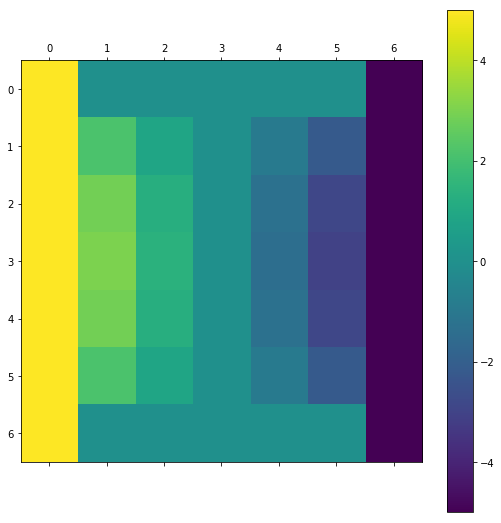

In [21]:
#Plot Voltage Matrix
plt.rcParams["figure.figsize"] = (12,9)
plt.matshow(V)
plt.colorbar()

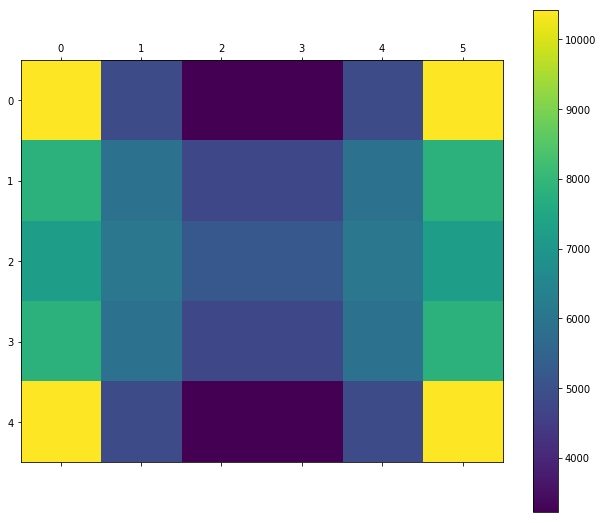

In [22]:
#Plot Field Matrix
plt.rcParams["figure.figsize"] = (12,9)
plt.matshow(E)
plt.colorbar()

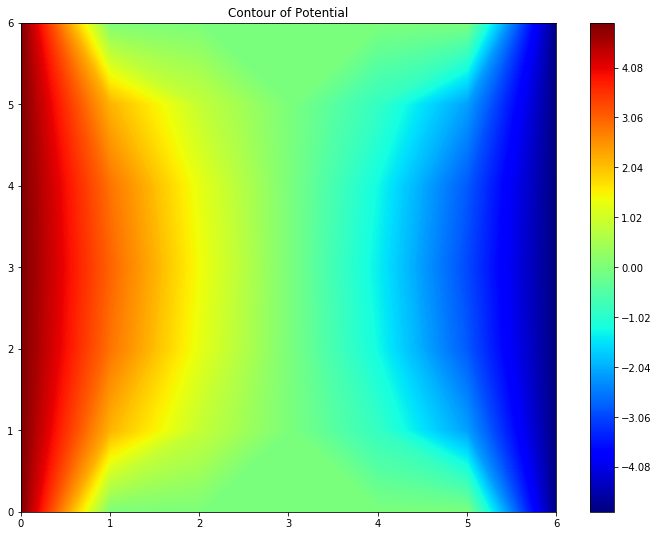

In [23]:
#Contour of Potential
plt.rcParams["figure.figsize"] = (12,9)
colorinterpolation = 500
colourMap = plt.cm.jet
lenX=lenY=7
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))
plt.title("Contour of Potential")
plt.contourf(X, Y, V, colorinterpolation, cmap=colourMap)
plt.colorbar()
plt.show()

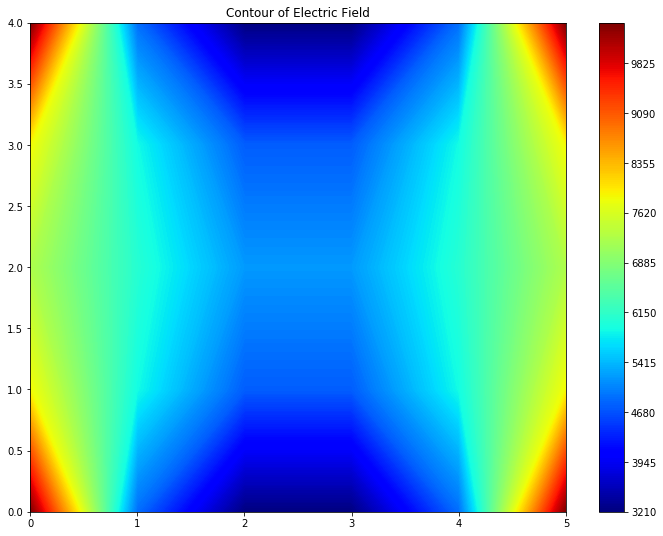

In [24]:
#Contour of Electric Field
plt.rcParams["figure.figsize"] = (12,9)
colorinterpolation = 500
colourMap = plt.cm.jet
lenX=6
lenY=5
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))
plt.title("Contour of Electric Field")
plt.contourf(X, Y, E, colorinterpolation, cmap=colourMap)
plt.colorbar()
plt.show()